# Preliminaries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import sys
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

sys.path.append("/Users/paolo/Documents/methods/CMI_FS")
from feature_selection import forwardFeatureSelection

sys.path.append("/Users/paolo/Documents/methods/LinCFA")
from LinCFA import LinCFA

sys.path.append("/Users/paolo/Documents/Droughts/Paolo/regression_LinCFA")
from aux import standardize,unfold_dataset,compute_r2,prepare_target,prepare_features,aggregate_unfolded_data,FS_with_linearWrapper,compare_methods


In [2]:
def plot_cells(output,selected_colnames, xmin=9, xmax=11, ymin=44, ymax=45.5):
    x = []
    y = []
    colors = cm.rainbow(np.linspace(0,1,len(output)))
    np.random.shuffle(colors)
    fig, ax = plt.subplots(2)
    ax[0].set_xlim(xmin,xmax)
    ax[1].set_xlim(xmin,xmax)
    ax[0].set_ylim(ymin,ymax)
    ax[1].set_ylim(ymin,ymax)
    for i in range(len(output)): 
        #print(len(output[i]))
        x = []
        y = []
        
        for datum in output[i]:
            x.append(float(datum.split('_')[1]))
            y.append(float(datum.split('_')[2]))
        ax[0].scatter(x,y,color=colors[i])
    
    x = []
    y = []
    col = cm.rainbow(np.linspace(0,1,len(selected_colnames)))
    for i in range(len(selected_colnames)): 
        idx = int(selected_colnames[i].split('_')[-1])
        for datum in output[idx]:
            x.append(float(datum.split('_')[1]))
            y.append(float(datum.split('_')[2]))
        ax[1].scatter(x,y,color=col[i])
    

In [3]:
### Nota: devo standardizzare tutto prima di chiamare LinCFA ma non serve validare
# infatti il metodo usa i dati per stimare i pesi della regressione lineare
# anche per CMI_FS non serve validare, usa i dati per quantificare l'informazione condivisa col target

# Target 

target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.339879
1    2001-01-13  0.484737    0.52  2001     2  0.402993
2    2001-01-21  0.466071    0.47  2001     3  0.282703
3    2001-01-29  0.417470    0.44  2001     5 -0.030490
4    2001-02-06  0.492202    0.53  2001     6  0.451097
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.436464    0.46  2009    48  0.091910
407  2009-12-05  0.466152    0.49  2009    49  0.283224
408  2009-12-13  0.553659    0.59  2009    50  0.847138
409  2009-12-21  0.507978    0.65  2009    52  0.552758
410  2009-12-29  0.083046    0.00  2009    53 -2.185583

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6), (228, 6))


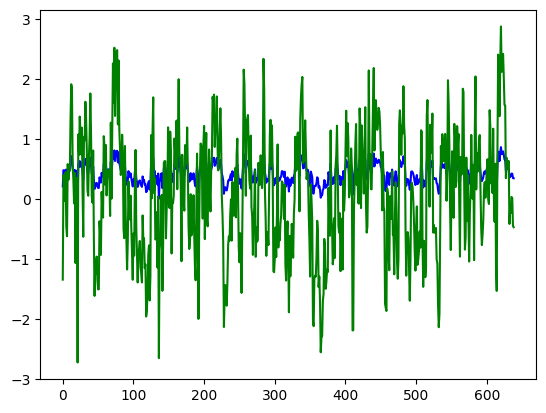

In [4]:
### target stops in 2019
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('',max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')
plt.plot(target_df_trainVal.loc[:,'mean'], color='blue')
plt.plot(target_df_trainVal.loc[:,'mean_std'], color='green')

# Only contemporary week, Emiliani2

## Features

In [5]:
path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg/Emiliani2_aggreg.csv'

df_test_unfolded_std = pd.DataFrame()
df_trainVal_unfolded_std = pd.DataFrame()

for col in ['cyclostationary_mean_tg','cyclostationary_mean_rr']:
    df_train_unfolded_std_loc,df_val_unfolded_std_loc,df_test_unfolded_std_loc,df_trainVal_unfolded_std_loc = prepare_features(path,col,multiple=False,max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')
    df_trainVal_unfolded_std_loc = df_trainVal_unfolded_std_loc.add_prefix(col)
    df_trainVal_unfolded_std = pd.concat([df_trainVal_unfolded_std, df_trainVal_unfolded_std_loc], axis=1)
    df_test_unfolded_std_loc = df_test_unfolded_std_loc.add_prefix(col)
    df_test_unfolded_std = pd.concat([df_test_unfolded_std, df_test_unfolded_std_loc], axis=1)
    

## temperature

### wrapper

In [6]:
filter_col = [col for col in df_trainVal_unfolded_std if col.startswith('cyclostationary_mean_tg')]

selected_colnames = FS_with_linearWrapper(df_trainVal_unfolded_std[filter_col], target_df_train, target_df_val, 50, 228)

compare_methods(df_trainVal_unfolded_std[filter_col], df_test_unfolded_std[filter_col], target_df_trainVal, target_df_test, selected_colnames)


actual training score: 0.11987729734899621
actual validation score: 0.21279964536699258, number of remaining columns: 128

actual training score: 0.12319924099112267
actual validation score: 0.22815666141378899, number of remaining columns: 127

actual training score: 0.127426538125472
actual validation score: 0.24160202811519027, number of remaining columns: 126

actual training score: 0.1305292724778072
actual validation score: 0.2541896302686356, number of remaining columns: 125

actual training score: 0.1318153684916593
actual validation score: 0.25886868615343117, number of remaining columns: 124

actual training score: 0.13210750650728986
actual validation score: 0.26046178546499343, number of remaining columns: 123

actual training score: 0.14215110738261305
actual validation score: 0.26953534651901145, number of remaining columns: 122

actual training score: 0.1424317757636958
actual validation score: 0.27211038818447497, number of remaining columns: 121

actual training score:

In [7]:
compare_methods(df_trainVal_unfolded_std, df_test_unfolded_std, target_df_trainVal, target_df_test, selected_colnames[0:5])


Full aggregate regression train score: 0.5798083803450997, test score: -0.5111893766376121
Aggregate regression train score with FS: 0.19360375083964598, test score: 0.09548091597183761


### CMI FS

In [8]:
res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
}

res['selectedFeatures'] = forwardFeatureSelection(10,np.array(df_trainVal_unfolded_std[filter_col]),np.array(target_df_trainVal.mean_std),res,10,1)
selectedFeatures='selectedFeatures'
print(f'\n{res[selectedFeatures]}\n')
selected_colnames = df_trainVal_unfolded_std[filter_col].columns[res['selectedFeatures']]
compare_methods(df_trainVal_unfolded_std[filter_col], df_test_unfolded_std[filter_col], target_df_trainVal, target_df_test, selected_colnames)


----- MI Scores -----
[(100, 0.14998699676357055), (99, 0.14933536712992324), (104, 0.14860373806543736), (105, 0.1412488284588791), (95, 0.13678834355637548), (101, 0.1349170730411436), (47, 0.1336253951612861), (106, 0.13270113122246438), (40, 0.13247441716956537), (102, 0.1314947303492075), (33, 0.13043798808455945), (109, 0.13021214040178367), (41, 0.12732735510523543), (10, 0.12663829279776576), (2, 0.12652023408954435), (4, 0.12447382429245563), (98, 0.12383644035918981), (65, 0.1199747643773004), (72, 0.1198351051186298), (108, 0.11920890899734782), (17, 0.1191326366947945), (70, 0.11873963045916126), (78, 0.11826149855296687), (107, 0.11820809108625745), (64, 0.1181717071449265), (71, 0.11652376952614193), (63, 0.11618521268822692), (111, 0.11570308887584992), (32, 0.11500091063679511), (39, 0.11478444579998306), (80, 0.11467125262879714), (88, 0.11421046071100244), (75, 0.11416473741640641), (12, 0.11391433239797001), (112, 0.11268624959976475), (66, 0.11222784012716981), (25,

## precipitation

### wrapper

In [9]:
filter_col = [col for col in df_trainVal_unfolded_std if col.startswith('cyclostationary_mean_rr')]

selected_colnames = FS_with_linearWrapper(df_trainVal_unfolded_std[filter_col], target_df_train, target_df_val, 50, 228)

compare_methods(df_trainVal_unfolded_std[filter_col], df_test_unfolded_std[filter_col], target_df_trainVal, target_df_test, selected_colnames)


actual training score: 0.08005107497739583
actual validation score: 0.0033215939370894176, number of remaining columns: 128

actual training score: 0.08090178600892617
actual validation score: 0.010384573177701917, number of remaining columns: 127

actual training score: 0.08324167885611466
actual validation score: 0.01723118546923963, number of remaining columns: 126

actual training score: 0.08558148677342059
actual validation score: 0.022088183842857934, number of remaining columns: 125

actual training score: 0.0938624327304659
actual validation score: 0.030904689814335695, number of remaining columns: 124

actual training score: 0.09475055265224086
actual validation score: 0.03472914476865574, number of remaining columns: 123

actual training score: 0.09841975115268764
actual validation score: 0.0377002876550282, number of remaining columns: 122

actual training score: 0.10043047458301624
actual validation score: 0.04205489169152998, number of remaining columns: 121

actual traini

In [10]:
compare_methods(df_trainVal_unfolded_std[filter_col], df_test_unfolded_std[filter_col], target_df_trainVal, target_df_test, selected_colnames[0:5])


Full aggregate regression train score: 0.26730193265380087, test score: -0.20690142378578225
Aggregate regression train score with FS: 0.08751102057978521, test score: 0.06069753956768109


### CMI FS

In [11]:
res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
}

res['selectedFeatures'] = forwardFeatureSelection(10,np.array(df_trainVal_unfolded_std[filter_col]),np.array(target_df_trainVal.mean_std),res,10,1)
selectedFeatures='selectedFeatures'
print(f'\n{res[selectedFeatures]}\n')
selected_colnames = df_trainVal_unfolded_std[filter_col].columns[res['selectedFeatures']]
compare_methods(df_trainVal_unfolded_std[filter_col], df_test_unfolded_std[filter_col], target_df_trainVal, target_df_test, selected_colnames)


----- MI Scores -----
[(2, 0.09635385463524024), (25, 0.09282593689432755), (11, 0.09039035951658314), (48, 0.08939889585589772), (33, 0.08929080749222586), (77, 0.08567593319484494), (55, 0.08551713286237457), (32, 0.08252158915719636), (10, 0.08109784004616086), (49, 0.08066136684979659), (0, 0.07919816591699666), (43, 0.07906753709178817), (3, 0.07845318215802785), (47, 0.07814540036499401), (34, 0.0775103132061131), (12, 0.07711577194258964), (104, 0.07640692573309547), (78, 0.0736016155052639), (8, 0.07326593931401697), (40, 0.07251133473690465), (42, 0.07246187219879614), (19, 0.07244443605460468), (57, 0.07227345967718729), (9, 0.07184183863304998), (118, 0.06990949338261673), (35, 0.06947425141065247), (51, 0.06842972470036243), (41, 0.0682046530932125), (110, 0.0681175128446899), (36, 0.06773914541819946), (26, 0.06694601173395667), (119, 0.0667735476776359), (70, 0.0666343370752187), (63, 0.06568406741359602), (88, 0.06521517179616287), (117, 0.06486701770963371), (56, 0.0641

## temperature and precipitation

### wrapper

In [12]:
selected_colnames = FS_with_linearWrapper(df_trainVal_unfolded_std, target_df_train, target_df_val, 50, 228)

compare_methods(df_trainVal_unfolded_std, df_test_unfolded_std, target_df_trainVal, target_df_test, selected_colnames)


actual training score: 0.11987729734899621
actual validation score: 0.21279964536699258, number of remaining columns: 258

actual training score: 0.12319924099112267
actual validation score: 0.22815666141378899, number of remaining columns: 257

actual training score: 0.127426538125472
actual validation score: 0.24160202811519027, number of remaining columns: 256

actual training score: 0.1305292724778072
actual validation score: 0.2541896302686356, number of remaining columns: 255

actual training score: 0.1318153684916593
actual validation score: 0.25886868615343117, number of remaining columns: 254

actual training score: 0.13210750650728986
actual validation score: 0.26046178546499343, number of remaining columns: 253

actual training score: 0.14215110738261305
actual validation score: 0.26953534651901145, number of remaining columns: 252

actual training score: 0.1424317757636958
actual validation score: 0.27211038818447497, number of remaining columns: 251

actual training score:

In [13]:
compare_methods(df_trainVal_unfolded_std, df_test_unfolded_std, target_df_trainVal, target_df_test, selected_colnames[0:5])


Full aggregate regression train score: 0.5798083803450997, test score: -0.5111893766376121
Aggregate regression train score with FS: 0.19360375083964598, test score: 0.09548091597183761


### repeat both with CMI FS

In [14]:
res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
}

res['selectedFeatures'] = forwardFeatureSelection(10,np.array(df_trainVal_unfolded_std),np.array(target_df_trainVal.mean_std),res,10,1)
selectedFeatures='selectedFeatures'
print(f'\n{res[selectedFeatures]}\n')
selected_colnames = df_trainVal_unfolded_std.columns[res['selectedFeatures']]
compare_methods(df_trainVal_unfolded_std, df_test_unfolded_std, target_df_trainVal, target_df_test, selected_colnames)


----- MI Scores -----
[(100, 0.14998699676357055), (99, 0.14933536712992324), (104, 0.14860373806543736), (105, 0.1412488284588791), (95, 0.13678834355637548), (101, 0.1349170730411436), (47, 0.1336253951612861), (106, 0.13270113122246438), (40, 0.13247441716956537), (102, 0.1314947303492075), (33, 0.13043798808455945), (109, 0.13021214040178367), (41, 0.12732735510523543), (10, 0.12663829279776576), (2, 0.12652023408954435), (4, 0.12447382429245563), (98, 0.12383644035918981), (65, 0.1199747643773004), (72, 0.1198351051186298), (108, 0.11920890899734782), (17, 0.1191326366947945), (70, 0.11873963045916126), (78, 0.11826149855296687), (107, 0.11820809108625745), (64, 0.1181717071449265), (71, 0.11652376952614193), (63, 0.11618521268822692), (111, 0.11570308887584992), (32, 0.11500091063679511), (39, 0.11478444579998306), (80, 0.11467125262879714), (88, 0.11421046071100244), (75, 0.11416473741640641), (12, 0.11391433239797001), (112, 0.11268624959976475), (66, 0.11222784012716981), (25,

# Shuffle

## Prepare data

In [17]:
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('',max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')
target_df_full = pd.concat([target_df_trainVal,target_df_test],axis=0)
target_df_full

target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.339879
1    2001-01-13  0.484737    0.52  2001     2  0.402993
2    2001-01-21  0.466071    0.47  2001     3  0.282703
3    2001-01-29  0.417470    0.44  2001     5 -0.030490
4    2001-02-06  0.492202    0.53  2001     6  0.451097
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.436464    0.46  2009    48  0.091910
407  2009-12-05  0.466152    0.49  2009    49  0.283224
408  2009-12-13  0.553659    0.59  2009    50  0.847138
409  2009-12-21  0.507978    0.65  2009    52  0.552758
410  2009-12-29  0.083046    0.00  2009    53 -2.185583

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6), (228, 6))


,date,mean,median,year,week,mean_std
0,2001-01-05,0.214281,0.00,2001,1,-1.339879
1,2001-01-13,0.484737,0.52,2001,2,0.402993
2,2001-01-21,0.466071,0.47,2001,3,0.282703
3,2001-01-29,0.417470,0.44,2001,5,-0.030490
4,2001-02-06,0.492202,0.53,2001,6,0.451097
...,...,...,...,...,...,...
862,2019-11-23,0.707366,0.76,2019,47,1.837653
863,2019-12-01,0.478972,0.50,2019,48,0.365839
864,2019-12-09,0.369868,0.40,2019,50,-0.337246
865,2019-12-17,0.496676,0.53,2019,51,0.479927


In [30]:
path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg/Emiliani2_aggreg.csv'

df_test_unfolded_std = pd.DataFrame()
df_trainVal_unfolded_std = pd.DataFrame()

for col in ['cyclostationary_mean_tg','cyclostationary_mean_rr']:
    df_train_unfolded_std_loc,df_val_unfolded_std_loc,df_test_unfolded_std_loc,df_trainVal_unfolded_std_loc = prepare_features(path,col,multiple=False,max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')
    df_trainVal_unfolded_std_loc = df_trainVal_unfolded_std_loc.add_prefix(col)
    df_trainVal_unfolded_std = pd.concat([df_trainVal_unfolded_std, df_trainVal_unfolded_std_loc], axis=1)
    df_test_unfolded_std_loc = df_test_unfolded_std_loc.add_prefix(col)
    df_test_unfolded_std = pd.concat([df_test_unfolded_std, df_test_unfolded_std_loc], axis=1)

df_full_unfolded_std = pd.concat([df_trainVal_unfolded_std, df_test_unfolded_std], axis=0).reset_index(drop=True)
df_full_unfolded_std


,cyclostationary_mean_tgmean_10.449860349182202_44.24986054919872,cyclostationary_mean_tgmean_10.449860349182202_44.34986054888138,cyclostationary_mean_tgmean_10.449860349182202_44.44986054856403,cyclostationary_mean_tgmean_10.449860349182202_44.54986054824669,cyclostationary_mean_tgmean_10.449860349182202_44.64986054792934,cyclostationary_mean_tgmean_10.449860349182202_44.749860547612,cyclostationary_mean_tgmean_10.449860349182202_44.849860547294654,cyclostationary_mean_tgmean_10.449860349182202_44.949860546977305,cyclostationary_mean_tgmean_10.549860348782152_44.24986054919872,cyclostationary_mean_tgmean_10.549860348782152_44.34986054888138,...,cyclostationary_mean_rrmean_9.949860351182458_44.849860547294654,cyclostationary_mean_rrmean_9.949860351182458_44.949860546977305,cyclostationary_mean_rrmean_9.949860351182458_45.04986054665997,cyclostationary_mean_rrmean_9.949860351182458_45.14986054634262,cyclostationary_mean_rrmean_9.949860351182458_45.24986054602528,cyclostationary_mean_rrmean_10.949860347181946_44.64986054792934,cyclostationary_mean_rrmean_10.949860347181946_44.749860547612,cyclostationary_mean_rrmean_10.949860347181946_44.849860547294654,cyclostationary_mean_rrmean_10.949860347181946_44.949860546977305,cyclostationary_mean_rrmean_10.949860347181946_45.04986054665997
0,0.289227,0.124864,0.461279,0.510020,0.520576,0.468040,0.540865,0.583502,0.279997,0.160805,...,1.030778,0.418412,0.773453,0.906438,1.088826,0.455843,0.716787,0.610504,0.749478,0.725402
1,1.465288,1.793975,2.180194,2.007116,1.814130,1.577802,1.418296,1.353838,1.387328,1.698076,...,0.425467,0.554635,0.680932,0.882635,1.038542,-0.180327,-0.182892,-0.163364,0.120539,0.278071
2,-1.343176,-1.039494,-0.116039,0.221848,0.163267,-0.104759,-0.347514,-0.401203,-1.511178,-1.118456,...,0.546370,0.037126,0.034397,0.010690,-0.001136,-0.109250,-0.161918,-0.223150,-0.227135,-0.226756
3,1.287995,1.347720,1.854175,1.771276,1.468763,1.169796,0.991305,0.942426,1.224261,1.271877,...,0.002881,-0.036101,-0.015739,-0.046510,0.443789,-0.420711,-0.471142,-0.426586,-0.304843,-0.281830
4,-0.622729,-0.213143,0.630215,0.751518,0.774634,0.655703,0.430421,0.388102,-0.785567,-0.359637,...,-0.372997,-0.407427,-0.438463,-0.458397,-0.486089,1.070021,0.731822,0.323260,0.239262,-0.245857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,-0.135936,0.335653,0.590066,0.690449,0.908015,0.920405,0.872771,0.747806,0.026023,0.374515,...,3.123885,3.482691,3.295810,3.540476,3.807857,4.652529,5.306489,4.985231,5.175604,5.232338
863,0.703901,1.151028,1.481872,1.587916,2.101657,2.181060,2.077229,1.983884,0.701685,1.175159,...,1.031786,1.294800,1.256462,1.209301,1.282215,-0.341716,-0.100919,-0.025505,0.083350,0.299507
864,0.715264,0.646292,0.809469,0.809123,1.186784,1.194561,1.113647,1.134730,0.553282,0.672209,...,0.547215,0.694045,0.629929,0.589199,0.461422,-0.041350,0.153126,0.141979,0.353912,0.360103
865,-0.494025,0.178697,0.523760,0.689497,1.280804,1.319110,1.202701,1.085489,-0.464753,0.117526,...,-0.469994,-0.536049,-0.478280,-0.398064,-0.345398,-0.069832,0.183811,-0.119752,-0.083736,-0.171210


In [31]:
full_df = df_full_unfolded_std.join(target_df_full.loc[:,'mean'])
full_df = full_df.sample(frac=1,random_state=42).reset_index().iloc[:,1:]
full_df = (full_df-full_df[0:411].mean())/full_df[0:411].std()
full_df = full_df.rename(columns={'mean':'mean_std'})
full_df

,cyclostationary_mean_tgmean_10.449860349182202_44.24986054919872,cyclostationary_mean_tgmean_10.449860349182202_44.34986054888138,cyclostationary_mean_tgmean_10.449860349182202_44.44986054856403,cyclostationary_mean_tgmean_10.449860349182202_44.54986054824669,cyclostationary_mean_tgmean_10.449860349182202_44.64986054792934,cyclostationary_mean_tgmean_10.449860349182202_44.749860547612,cyclostationary_mean_tgmean_10.449860349182202_44.849860547294654,cyclostationary_mean_tgmean_10.449860349182202_44.949860546977305,cyclostationary_mean_tgmean_10.549860348782152_44.24986054919872,cyclostationary_mean_tgmean_10.549860348782152_44.34986054888138,...,cyclostationary_mean_rrmean_9.949860351182458_44.949860546977305,cyclostationary_mean_rrmean_9.949860351182458_45.04986054665997,cyclostationary_mean_rrmean_9.949860351182458_45.14986054634262,cyclostationary_mean_rrmean_9.949860351182458_45.24986054602528,cyclostationary_mean_rrmean_10.949860347181946_44.64986054792934,cyclostationary_mean_rrmean_10.949860347181946_44.749860547612,cyclostationary_mean_rrmean_10.949860347181946_44.849860547294654,cyclostationary_mean_rrmean_10.949860347181946_44.949860546977305,cyclostationary_mean_rrmean_10.949860347181946_45.04986054665997,mean_std
0,-1.907532,-1.682061,-1.636837,-1.447221,-1.651621,-1.789657,-1.773938,-1.765519,-1.827034,-1.522062,...,2.680492,2.483540,2.298060,2.115776,3.082756,3.765058,4.238587,3.975472,3.290175,-0.661044
1,-0.139650,0.373559,0.330876,0.368704,0.376525,0.559680,0.404679,0.007378,-0.105782,0.473611,...,-0.085027,-0.014359,0.024813,0.029678,-0.563054,-0.539303,-0.462554,-0.480079,-0.369121,-0.297584
2,1.452839,0.925917,0.919736,0.774817,1.369399,1.681362,1.919478,2.097916,1.405686,0.969203,...,-0.286119,-0.302681,-0.306277,-0.347743,-0.227448,-0.254241,-0.221311,-0.238945,-0.272312,-0.429146
3,0.813751,0.551454,0.612530,0.605539,0.891466,1.201659,1.244624,1.265765,0.937093,0.538183,...,-0.606184,-0.650500,-0.628037,-0.540528,-0.697009,-0.630885,-0.613395,-0.652477,-0.643339,-0.764523
4,1.101256,1.270600,1.431554,1.573412,1.378359,1.249166,0.961226,0.828510,1.117718,1.356833,...,-0.374664,-0.428551,-0.458382,-0.316997,-0.877898,-0.390408,-0.259650,-0.392721,-0.398642,-0.775203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,1.066725,0.846112,0.655526,0.487559,0.886012,1.006498,1.057889,1.193508,0.934124,0.699974,...,-1.031660,-1.043380,-1.115552,-1.119300,-0.665611,-0.817923,-0.788223,-0.748067,-1.013836,-1.532354
863,0.250601,0.267136,0.276058,0.286012,0.473997,0.685578,0.792447,0.896260,0.567198,0.309232,...,-1.350416,-1.231876,-1.271329,-1.302841,-1.752506,-1.344566,-1.328298,-1.259138,-1.217352,-0.601107
864,0.033176,0.281860,0.420926,0.420118,0.875294,1.001942,0.952190,0.886205,0.085078,0.256182,...,0.035303,0.196447,0.349873,0.311281,-0.638395,-0.315822,-0.248010,-0.022468,0.119987,0.320812
865,1.251260,1.108290,1.103918,1.209919,1.118452,1.008791,0.958105,0.923778,1.072212,1.192201,...,-0.231688,-0.283688,-0.339038,-0.353560,-0.177773,-0.304083,-0.252493,-0.262842,-0.309468,0.595229


## Temperature

In [41]:
filter_col = [col for col in full_df if col.startswith('cyclostationary_mean_tg')]

selected_colnames = FS_with_linearWrapper(full_df.loc[0:638,filter_col], full_df.iloc[0:411,:], full_df.loc[411:638,:], 50, 228)

compare_methods(full_df.loc[0:638,filter_col], full_df.loc[638:,filter_col], full_df.loc[0:638,:], full_df.loc[638:,:], selected_colnames)


actual training score: 0.19976487892489103
actual validation score: 0.07208944939352602, number of remaining columns: 128

actual training score: 0.20318367129690706
actual validation score: 0.08975469128272817, number of remaining columns: 127

actual training score: 0.2041180204580062
actual validation score: 0.096504930308278, number of remaining columns: 126

actual training score: 0.20983392106544263
actual validation score: 0.11809821497712814, number of remaining columns: 125

actual training score: 0.22275691503544415
actual validation score: 0.14600211460329038, number of remaining columns: 124

actual training score: 0.22811044106445122
actual validation score: 0.15799358503336802, number of remaining columns: 123

actual training score: 0.22954086989828004
actual validation score: 0.16461223962700466, number of remaining columns: 122

actual training score: 0.2317476785661584
actual validation score: 0.1759881388288328, number of remaining columns: 121

actual training score

In [43]:
compare_methods(full_df.loc[0:638,filter_col], full_df.loc[638:,filter_col], full_df.loc[0:638,:], full_df.loc[638:,], selected_colnames[0:5])


Full aggregate regression train score: 0.48883631310889974, test score: 0.04595282822903346
Aggregate regression train score with FS: 0.19041537379579154, test score: 0.21685832687827955


In [44]:
res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
}

res['selectedFeatures'] = forwardFeatureSelection(10,np.array(full_df.loc[0:638,filter_col]),np.array(full_df.loc[0:638,:].mean_std),res,10,1)
selectedFeatures='selectedFeatures'
print(f'\n{res[selectedFeatures]}\n')
selected_colnames = full_df.loc[0:638,filter_col].columns[res['selectedFeatures']]
compare_methods(full_df.loc[0:638,filter_col], full_df.loc[638:,filter_col], full_df.loc[0:638,:], full_df.loc[638:,:], selected_colnames)


----- MI Scores -----
[(100, 0.13115146225433175), (47, 0.12529854451293632), (95, 0.12343394313917598), (101, 0.12251843052558677), (94, 0.1222125388372185), (98, 0.1206570669145491), (36, 0.11801804592178936), (96, 0.11522996077282896), (80, 0.11421918465112567), (106, 0.11370458906621517), (102, 0.1136338927758563), (99, 0.10989740293543217), (105, 0.1093457344027088), (5, 0.10925817300758228), (65, 0.10877380614490663), (3, 0.1040820534474012), (103, 0.10326016545027922), (79, 0.10215449205293317), (109, 0.1019669052256827), (8, 0.10192248837098943), (32, 0.10190763642623409), (107, 0.10169221424238457), (55, 0.10142474923744119), (108, 0.10108425101644086), (12, 0.10076483734189416), (104, 0.10050548820428315), (70, 0.10050129542949796), (73, 0.10038282257869047), (85, 0.10008229845875392), (71, 0.09980785169426055), (112, 0.09955659498417122), (72, 0.09933846161753716), (39, 0.09870686410111702), (115, 0.09848487829127502), (28, 0.0973080062104816), (9, 0.09728044953980844), (75,

In [45]:
compare_methods(full_df.loc[0:638,filter_col], full_df.loc[638:,filter_col], full_df.loc[0:638,:], full_df.loc[638:,], selected_colnames[0:5])


Full aggregate regression train score: 0.48883631310889974, test score: 0.04595282822903346
Aggregate regression train score with FS: 0.15862756302031422, test score: 0.19319695215668053


## Precipitation

In [46]:
filter_col = [col for col in full_df if col.startswith('cyclostationary_mean_rr')]

selected_colnames = FS_with_linearWrapper(full_df.loc[0:638,filter_col], full_df.iloc[0:411,:], full_df.loc[411:638,:], 50, 228)

compare_methods(full_df.loc[0:638,filter_col], full_df.loc[638:,filter_col], full_df.loc[0:638,:], full_df.loc[638:,:], selected_colnames)


actual training score: 0.06320187789337384
actual validation score: 0.08060391835913072, number of remaining columns: 128

actual training score: 0.06672284288025576
actual validation score: 0.08772770450548562, number of remaining columns: 127

actual training score: 0.06680825498507903
actual validation score: 0.09045621145151017, number of remaining columns: 126

actual training score: 0.07341929199741692
actual validation score: 0.09342002917962478, number of remaining columns: 125

actual training score: 0.07470430315107024
actual validation score: 0.09562037276707214, number of remaining columns: 124

actual training score: 0.07516450198836577
actual validation score: 0.09690048788385008, number of remaining columns: 123

actual training score: 0.07810075502487634
actual validation score: 0.09889619017725326, number of remaining columns: 122

actual training score: 0.08093160858608184
actual validation score: 0.09995180718637275, number of remaining columns: 121

actual training 

In [47]:
compare_methods(full_df.loc[0:638,filter_col], full_df.loc[638:,filter_col], full_df.loc[0:638,:], full_df.loc[638:,], selected_colnames[0:5])


Full aggregate regression train score: 0.2588890597997985, test score: -0.21705411698134447
Aggregate regression train score with FS: 0.08169853751520206, test score: 0.030774428251509334


In [48]:
res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
}

res['selectedFeatures'] = forwardFeatureSelection(10,np.array(full_df.loc[0:638,filter_col]),np.array(full_df.loc[0:638,:].mean_std),res,10,1)
selectedFeatures='selectedFeatures'
print(f'\n{res[selectedFeatures]}\n')
selected_colnames = full_df.loc[0:638,filter_col].columns[res['selectedFeatures']]
compare_methods(full_df.loc[0:638,filter_col], full_df.loc[638:,filter_col], full_df.loc[0:638,:], full_df.loc[638:,:], selected_colnames)


----- MI Scores -----
[(2, 0.09959459719637279), (51, 0.08433964904112626), (33, 0.0841600509543418), (41, 0.084050393900234), (34, 0.08260339667291272), (55, 0.08147297899315398), (40, 0.07684246321097386), (37, 0.07620705061466944), (10, 0.07605933136310757), (11, 0.07553572732922176), (77, 0.07552520725892255), (48, 0.0741929324795341), (26, 0.07190869201568285), (5, 0.07143490034738877), (57, 0.07095434421051776), (36, 0.07086193924598042), (56, 0.07080101055235852), (22, 0.06907432076555431), (47, 0.06899107449584989), (52, 0.0668498665451418), (49, 0.06681138231164667), (53, 0.06149280921286602), (8, 0.06101649091770182), (25, 0.06038216377975398), (42, 0.05919799863125579), (43, 0.059004111699329294), (12, 0.058830396337731565), (45, 0.058698908369084216), (15, 0.05836926906876427), (90, 0.05803777182252887), (39, 0.05787016890372238), (0, 0.05764593906021578), (29, 0.057606116062844076), (50, 0.055797173582120545), (28, 0.05576112530040044), (95, 0.0554071612781565), (129, 0.05

In [49]:
compare_methods(full_df.loc[0:638,filter_col], full_df.loc[638:,filter_col], full_df.loc[0:638,:], full_df.loc[638:,], selected_colnames[0:5])


Full aggregate regression train score: 0.2588890597997985, test score: -0.21705411698134447
Aggregate regression train score with FS: 0.08717107808513835, test score: 0.005226090782584736


## Both

In [50]:
filter_col = [col for col in full_df if col.startswith('cyclostationary_mean')]

selected_colnames = FS_with_linearWrapper(full_df.loc[0:638,filter_col], full_df.iloc[0:411,:], full_df.loc[411:638,:], 50, 228)

compare_methods(full_df.loc[0:638,filter_col], full_df.loc[638:,filter_col], full_df.loc[0:638,:], full_df.loc[638:,:], selected_colnames)


actual training score: 0.06320187789337384
actual validation score: 0.08060391835913072, number of remaining columns: 258

actual training score: 0.06672284288025576
actual validation score: 0.08772770450548562, number of remaining columns: 257

actual training score: 0.06680825498507903
actual validation score: 0.09045621145151017, number of remaining columns: 256

actual training score: 0.07341929199741692
actual validation score: 0.09342002917962478, number of remaining columns: 255

actual training score: 0.19317739854020433
actual validation score: 0.09741170478504546, number of remaining columns: 254

actual training score: 0.2016596350114388
actual validation score: 0.13190929113574557, number of remaining columns: 253

actual training score: 0.20555989695451582
actual validation score: 0.1413357370513001, number of remaining columns: 252

actual training score: 0.21441410435494956
actual validation score: 0.1475370367218397, number of remaining columns: 251

actual training sco

Full aggregate regression train score: 0.6193505949134028, test score: -0.344081534174133
Aggregate regression train score with FS: 0.2692518568152297, test score: 0.1339090432608404


In [51]:
compare_methods(full_df.loc[0:638,filter_col], full_df.loc[638:,filter_col], full_df.loc[0:638,:], full_df.loc[638:,], selected_colnames[0:5])


Full aggregate regression train score: 0.6193505949134028, test score: -0.344081534174133
Aggregate regression train score with FS: 0.08169853751520206, test score: 0.030774428251509334


In [52]:
res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
}

res['selectedFeatures'] = forwardFeatureSelection(10,np.array(full_df.loc[0:638,filter_col]),np.array(full_df.loc[0:638,:].mean_std),res,10,1)
selectedFeatures='selectedFeatures'
print(f'\n{res[selectedFeatures]}\n')
selected_colnames = full_df.loc[0:638,filter_col].columns[res['selectedFeatures']]
compare_methods(full_df.loc[0:638,filter_col], full_df.loc[638:,filter_col], full_df.loc[0:638,:], full_df.loc[638:,:], selected_colnames)


----- MI Scores -----
[(100, 0.13115146225433175), (47, 0.12529854451293632), (95, 0.12343394313917598), (101, 0.12251843052558677), (94, 0.1222125388372185), (98, 0.1206570669145491), (36, 0.11801804592178936), (96, 0.11522996077282896), (80, 0.11421918465112567), (106, 0.11370458906621517), (102, 0.1136338927758563), (99, 0.10989740293543217), (105, 0.1093457344027088), (5, 0.10925817300758228), (65, 0.10877380614490663), (3, 0.1040820534474012), (103, 0.10326016545027922), (79, 0.10215449205293317), (109, 0.1019669052256827), (8, 0.10192248837098943), (32, 0.10190763642623409), (107, 0.10169221424238457), (55, 0.10142474923744119), (108, 0.10108425101644086), (12, 0.10076483734189416), (104, 0.10050548820428315), (70, 0.10050129542949796), (73, 0.10038282257869047), (85, 0.10008229845875392), (71, 0.09980785169426055), (132, 0.09959459719637279), (112, 0.09955659498417122), (72, 0.09933846161753716), (39, 0.09870686410111702), (115, 0.09848487829127502), (28, 0.0973080062104816), (9

CMI: 0.003167049011002704
Highest CMI score: 0.006021248944499374
Adding original feature: 82
CMI: 0.002570953750049426
CMI: 0.0011829816616773792
Highest CMI score: 0.002570953750049426
Adding original feature: 101
CMI: 0.000940849731086213
CMI: 0.0017450135880750783
CMI: 0.0017134950972087504
CMI: 0.0021867086125234303
CMI: 0.00882654219168827
CMI: 0.0005274045989169529
CMI: 0.001755842419385173
CMI: 0.001397129167193839
CMI: 0.001188840964547938
CMI: 0.0029429704513009025
CMI: 0.00043532465673043474
CMI: 0.002046848901439413
CMI: 0.0009656892142392015
CMI: 0.0044223150811384115
CMI: 0.0006672718112557541
CMI: 0.0046853397524433404
CMI: 0.0034608033727126786
CMI: 0.0018789532765219885
CMI: 0.0009326491608150356
Highest CMI score: 0.00882654219168827
Adding original feature: 17
CMI: 0.0055716540915408674
CMI: 0.0026221245091079537
CMI: 0.002464359458834081
CMI: 0.0037969459992078514
Highest CMI score: 0.0055716540915408674
Adding original feature: 4
CMI: 0.0004971753968967263
CMI: 0.0

In [53]:
compare_methods(full_df.loc[0:638,filter_col], full_df.loc[638:,filter_col], full_df.loc[0:638,:], full_df.loc[638:,], selected_colnames[0:5])


Full aggregate regression train score: 0.6193505949134028, test score: -0.344081534174133
Aggregate regression train score with FS: 0.15862756302031422, test score: 0.19319695215668053
